# Notebook for preparing and saving MNIST graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download MNIST dataset

In [2]:
if not os.path.isfile('superpixels.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/y2qwa77a0fxem47/superpixels.zip?dl=1 -o superpixels.zip -J -L -k
    !unzip superpixels.zip -d ../
    # !tar -xvf superpixels.zip -C ../
else:
    print('File already downloaded')

downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  324M  100  324M    0     0  7024k      0  0:00:47  0:00:47 --:--:-- 9629k     0  9647k      0  0:00:34  0:00:28  0:00:06 4353k
Archive:  superpixels.zip
 extracting: ../superpixels/cifar10_150sp_test.pkl  
 extracting: ../superpixels/cifar10_150sp_train.pkl  
 extracting: ../superpixels/mnist_75sp_test.pkl  
 extracting: ../superpixels/mnist_75sp_train.pkl  


# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/Users/xbresson/Documents/Dropbox/06_NTU_2017_now/03_my_codes/34_benchmark20/GITHUB_benchmark_project/benchmarking-gnn


In [4]:
import pickle

%load_ext autoreload
%autoreload 2

from data.superpixels import SuperPixDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.superpixels import SuperPixDataset


In [5]:
start = time.time()

DATASET_NAME = 'MNIST'
dataset = SuperPixDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) # 356s=6min


Adj matrix defined from super-pixel locations (only)
preparing 10000 graphs for the TEST set...
preparing 60000 graphs for the TRAIN set...
[I] Data load time: 361.0098s
Time (sec): 361.0104629993439


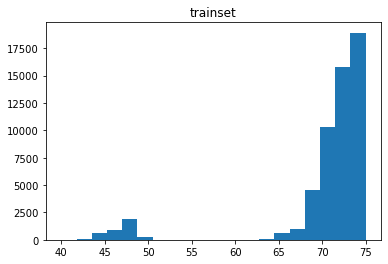

nb/min/max : 55000 40 75


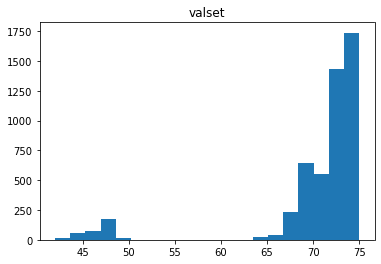

nb/min/max : 5000 42 75


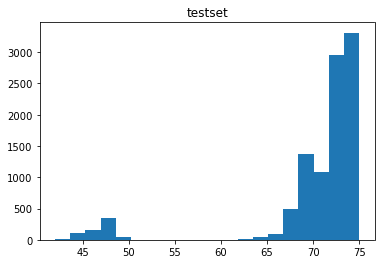

nb/min/max : 10000 42 75


In [6]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [7]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


55000
5000
10000
(DGLGraph(num_nodes=69, num_edges=552,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(7))
(DGLGraph(num_nodes=71, num_edges=568,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(5))
(DGLGraph(num_nodes=74, num_edges=592,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(7))


In [8]:
start = time.time()

with open('data/superpixels/MNIST.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 38s


Time (sec): 36.544209003448486


# Test load function

In [9]:
DATASET_NAME = 'MNIST'
dataset = LoadData(DATASET_NAME) # 54s
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset MNIST...
train, test, val sizes : 55000 5000 10000
[I] Finished loading.
[I] Data load time: 43.6288s


In [10]:
start = time.time()

batch_size = 10
collate = SuperPixDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start) # 0.0003s


Time (sec): 0.00020384788513183594
